In [103]:
import numpy as np
import pandas as pd

In [105]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [107]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [111]:
df.shape

(5110, 12)

In [113]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [115]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [117]:
print(df['bmi'].isnull().sum())

201


In [119]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

/var/folders/_s/phngz_791kv1f1m1b_nh0j4m0000gn/T/ipykernel_50633/2033710380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(),inplace=True)


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Stroke count(Class Imbalance)')

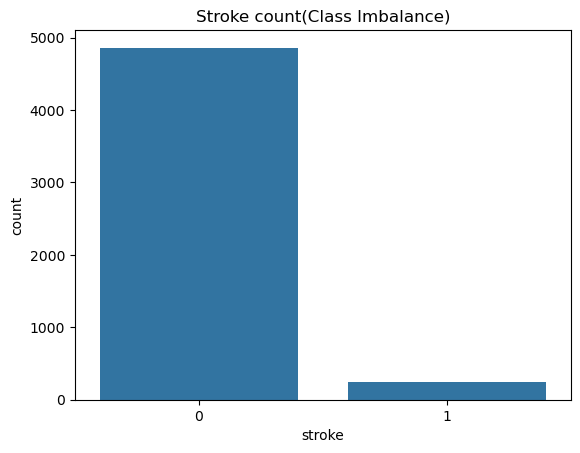

In [123]:
sns.countplot(x='stroke',data=df)
plt.title("Stroke count(Class Imbalance)")

<Axes: xlabel='age', ylabel='Count'>

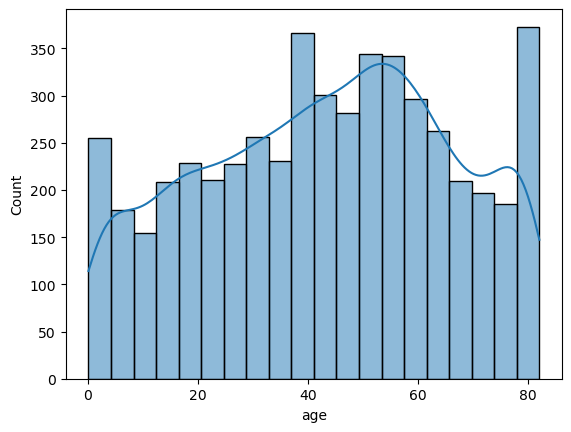

In [124]:
sns.histplot(df['age'],kde=True,bins=20)

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

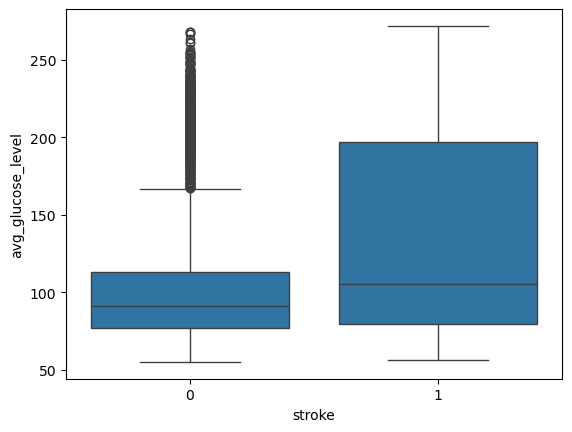

In [127]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)

<Axes: xlabel='stroke', ylabel='bmi'>

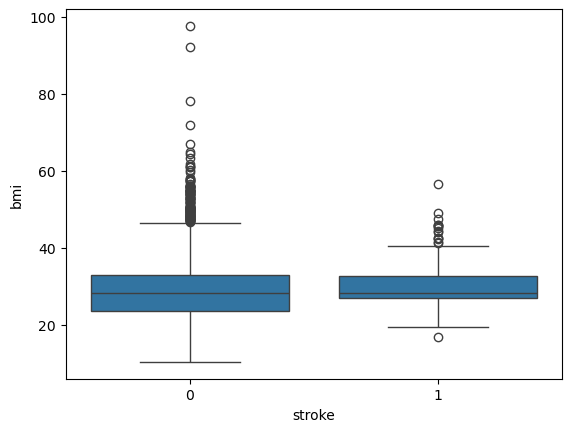

In [129]:
sns.boxplot(x='stroke',y='bmi',data=df)

<Axes: xlabel='hypertension', ylabel='count'>

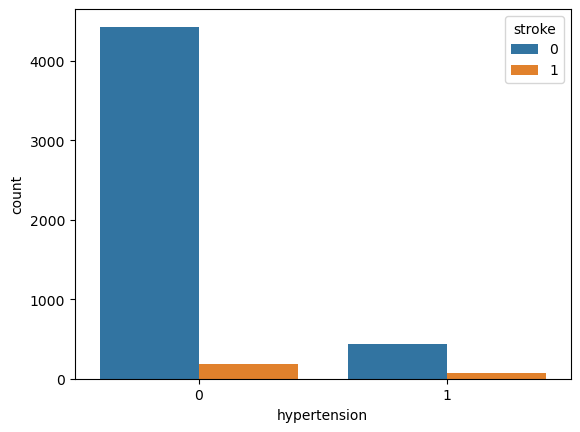

In [131]:
sns.countplot(x='hypertension', hue='stroke', data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

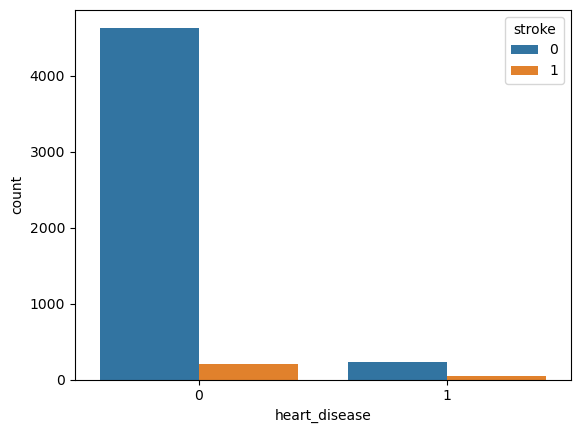

In [133]:
sns.countplot(x='heart_disease',hue='stroke',data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

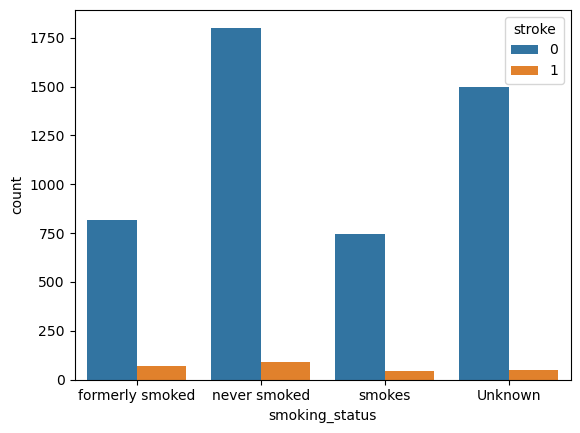

In [135]:
sns.countplot(x='smoking_status',hue='stroke',data=df)

In [137]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], 
                         labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elder'])


In [139]:
df['risk_score']= (
    df['hypertension'] + df['heart_disease'] +
    (df['avg_glucose_level'] > 140).astype(int) +
    (df['bmi']>30).astype(int)
)

In [141]:
df['risk_score']

0       3
1       1
2       2
3       2
4       2
       ..
5105    1
5106    1
5107    1
5108    1
5109    0
Name: risk_score, Length: 5110, dtype: int64

In [143]:
df.drop('id',axis=1,inplace=True)

In [145]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,risk_score
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder,3
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Senior,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder,2


In [147]:
df = pd.get_dummies(data=df,columns = ['gender','ever_married','Residence_type','work_type','smoking_status','age_group'],drop_first=True)

In [149]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,risk_score,gender_Male,gender_Other,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Young Adult,age_group_Adult,age_group_Senior,age_group_Elder
0,67.0,0,1,228.69,36.6,1,3,True,False,True,...,True,False,False,True,False,False,False,False,False,True
1,61.0,0,0,202.21,28.1,1,1,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,2,True,False,True,...,True,False,False,False,True,False,False,False,False,True
3,49.0,0,0,171.23,34.4,1,2,False,False,True,...,True,False,False,False,False,True,False,True,False,False
4,79.0,1,0,174.12,24.0,1,2,False,False,True,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1,False,False,True,...,True,False,False,False,True,False,False,False,False,True
5106,81.0,0,0,125.20,40.0,0,1,False,False,True,...,False,True,False,False,True,False,False,False,False,True
5107,35.0,0,0,82.99,30.6,0,1,False,False,True,...,False,True,False,False,True,False,True,False,False,False
5108,51.0,0,0,166.29,25.6,0,1,True,False,True,...,True,False,False,True,False,False,False,False,True,False


In [151]:
from sklearn.model_selection import train_test_split

In [153]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [157]:
from imblearn.over_sampling import SMOTE

In [161]:
sm = SMOTE(random_state=42)

X_train_res,y_train_res = sm.fit_resample(x_train,y_train)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [165]:
clf = RandomForestClassifier()
clf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [171]:
y_pred = clf.predict(x_test)

In [173]:
print("classification Report",classification_report(y_test,y_pred))
print("confusion Matrix",confusion_matrix(y_test,y_pred))

classification Report               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1444
           1       0.19      0.09      0.12        89

    accuracy                           0.92      1533
   macro avg       0.57      0.53      0.54      1533
weighted avg       0.90      0.92      0.91      1533

confusion Matrix [[1409   35]
 [  81    8]]


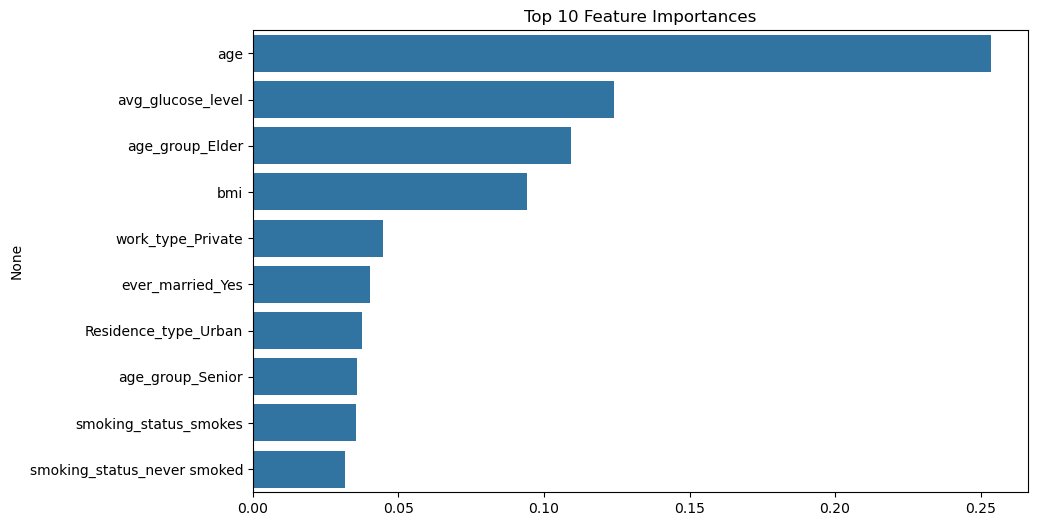

In [180]:
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title("Top 10 Feature Importances")
plt.show()

In [184]:
from sklearn.linear_model import LogisticRegression

In [190]:
lr = LogisticRegression(max_iter=1000)

In [194]:
lr.fit(X_train_res,y_train_res)

LogisticRegression(max_iter=1000)

In [198]:
y_pred = lr.predict(x_test)

In [204]:
from sklearn.metrics import classification_report

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1444
           1       0.19      0.40      0.26        89

    accuracy                           0.86      1533
   macro avg       0.57      0.65      0.59      1533
weighted avg       0.92      0.86      0.89      1533



In [216]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 601.7 kB/s eta 0:00:00a 0:00:01


In [217]:
from xgboost import XGBClassifier

In [220]:
xgb= XGBClassifier(use_label_encoder=False,eval_metric='logloss')

In [222]:
xgb.fit(X_train_res,y_train_res)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [224]:
y_pred_xgb = xgb.predict(x_test)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1444
           1       0.19      0.40      0.26        89

    accuracy                           0.86      1533
   macro avg       0.57      0.65      0.59      1533
weighted avg       0.92      0.86      0.89      1533



In [230]:
from sklearn.model_selection import GridSearchCV

In [232]:
params = {
    'n_estiimators':[50,10],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1]
}
grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, scoring='f1', cv=3)
grid.fit(X_train_res,y_train_res)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estiimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estiimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estiimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estiimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estiimators': [50, 10]},
             scoring='f1')

In [234]:
print('Best Param',grid.best_params_)

Best Param {'learning_rate': 0.1, 'max_depth': 7, 'n_estiimators': 50}


In [238]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 793.5 kB/s eta 0:00:00:--:--
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.0 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [ ]:
import shap


explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test)


shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
